In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
data = pd.read_csv("../dataset/news_politics_final.csv")

In [32]:
X_train_pipe, X_test_pipe, Y_train_pipe, Y_test_pipe = train_test_split(data["Content"], data["label"], test_size= 0.3, random_state= 42)
X_train_pipe.shape, X_test_pipe.shape, Y_train_pipe.shape, Y_test_pipe.shape

((1464,), (628,), (1464,), (628,))

In [5]:
def heatconmat(y_pred, y_test):
  cnf_matrix = confusion_matrix(y_pred, y_test)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

              precision    recall  f1-score   support

        fake     0.9763    0.9796    0.9779       294
        real     0.9820    0.9790    0.9805       334

    accuracy                         0.9793       628
   macro avg     0.9791    0.9793    0.9792       628
weighted avg     0.9793    0.9793    0.9793       628



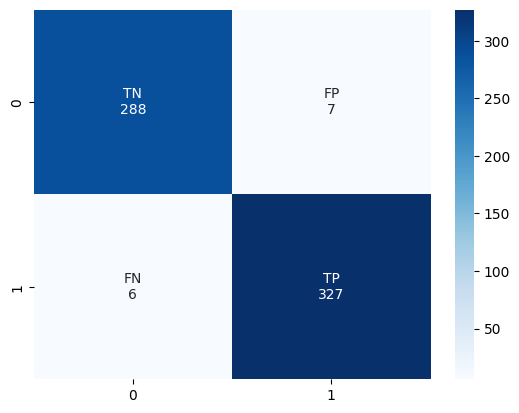

In [6]:
SVM_tf_idf = pickle.load(open("../Model_SVM/model_svm.sav", "rb"))
y_svm_tf_idf_predict = SVM_tf_idf.predict(X_test_pipe)
print(classification_report(Y_test_pipe, y_svm_tf_idf_predict, digits=4))
heatconmat(y_svm_tf_idf_predict, Y_test_pipe)

In [24]:
svm_wrong_predict = []
for i in range(len(y_svm_tf_idf_predict)):
    if Y_test_pipe.iloc[i] != y_svm_tf_idf_predict[i]:
        svm_wrong_predict.append(X_test_pipe.iloc[i])

              precision    recall  f1-score   support

        fake     0.9143    0.9796    0.9458       294
        real     0.9808    0.9192    0.9490       334

    accuracy                         0.9475       628
   macro avg     0.9476    0.9494    0.9474       628
weighted avg     0.9497    0.9475    0.9475       628



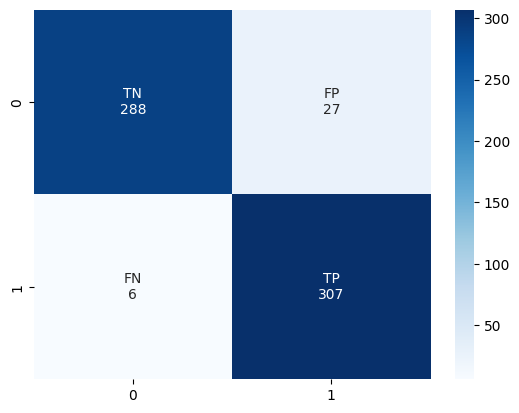

In [13]:

KNN_model = pickle.load(open("../Model_KNN/Word2Vec_pickle_KNN.pkl", "rb"))
KNN_pred = KNN_model.predict(X_test_pipe)
print(classification_report(Y_test_pipe, KNN_pred, digits=4))
heatconmat(KNN_pred, Y_test_pipe)

In [23]:
knn_wrong_predict = []
for i in range(len(KNN_pred)):
    if Y_test_pipe.iloc[i] != KNN_pred[i]:
        knn_wrong_predict.append(X_test_pipe.iloc[i])

              precision    recall  f1-score   support

        fake     0.9267    0.9456    0.9360       294
        real     0.9512    0.9341    0.9426       334

    accuracy                         0.9395       628
   macro avg     0.9389    0.9399    0.9393       628
weighted avg     0.9397    0.9395    0.9395       628



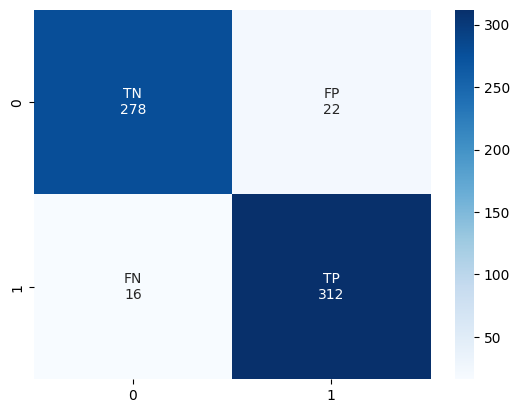

In [15]:

NB_model = pickle.load(open("../Model_NB/Word2Vec_pickle_NB.pkl", "rb"))
NB_pred = NB_model.predict(X_test_pipe)
print(classification_report(Y_test_pipe, NB_pred, digits=4))
heatconmat(NB_pred, Y_test_pipe)

In [22]:
nb_wrong_predict = []
for i in range(len(NB_pred)):
    if Y_test_pipe.iloc[i] != NB_pred[i]:
        nb_wrong_predict.append(X_test_pipe.iloc[i])

2022-12-26 08:42:50.757789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 08:43:00.392489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


20/20 [==============================] - 2s 45ms/step
              precision    recall  f1-score   support

        fake     0.9452    0.9388    0.9420       294
        real     0.9464    0.9521    0.9493       334

    accuracy                         0.9459       628
   macro avg     0.9458    0.9454    0.9456       628
weighted avg     0.9459    0.9459    0.9458       628



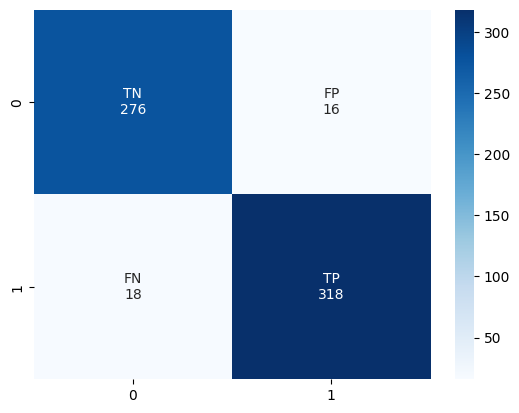

In [17]:
LSTM_model = pickle.load(open("../Model_LSTM/LSTM_pickle.pkl", "rb"))
LSTM_pred = LSTM_model.predict(X_test_pipe)
print(classification_report(Y_test_pipe, LSTM_pred, digits=4))
heatconmat(LSTM_pred, Y_test_pipe)

In [20]:
lstm_wrong_predict = []
for i in range(len(LSTM_pred)):
    if Y_test_pipe.iloc[i] != LSTM_pred[i]:
        lstm_wrong_predict.append(X_test_pipe.iloc[i])

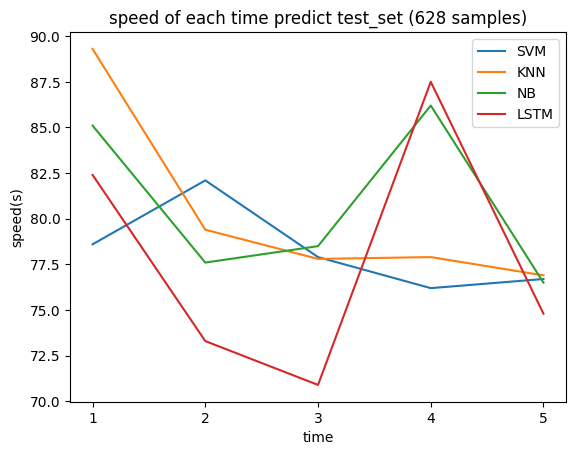

In [32]:
import matplotlib.pyplot as plt
x = [[78.6, 82.1, 77.9, 76.2, 76.7], [89.3, 79.4, 77.8, 77.9, 76.9], [85.1, 77.6, 78.5, 86.2, 76.5], [82.4, 73.3, 70.9, 87.5, 74.8]]
time = [1,2,3,4,5]
algorithm = ["SVM", "KNN", "NB", "LSTM"]
x = np.array(x)
x = x.T
fig, ax = plt.subplots()
ax.plot(time, x)
ax.legend(algorithm)
ax.set(xlabel='time', ylabel="speed(s)",
       title='speed of each time predict test_set (628 samples)')
ax.set_xticks(time)

In [26]:
d = {"svm": svm_wrong_predict, "knn":knn_wrong_predict, "nb": nb_wrong_predict, "lstm":lstm_wrong_predict}

In [27]:
wrong_predict = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

In [7]:
wrong_predict

NameError: name 'wrong_predict' is not defined